Initial setup

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
%run "Common setup.ipynb"

In [6]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [7]:
corpora_df.to_csv('../data/corpora_rest.csv')

In [8]:
# Checking if expected paper is in corpora
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

,id,year,title,keywords,abstract,copyright,AU,SO,DE,DOI
1984,WOS:000367774700005,2015,Chaospy: An open source tool for designing met...,,"The paper describes the philosophy, design, fu...",Published by Elsevier B.V.,"Feinberg, J|Langtangen, HP",JOURNAL OF COMPUTATIONAL SCIENCE,uncertainty quantification polynomial chaos ex...,10.1016/j.jocs.2015.08.008


<hr>

Criteria analysis of filtered corpora: <br>
- Search papers in topic of interest by keyword
- Run criteria search on filtered corpora
- Plot trend in criteria matches

Plotting the publication trend of papers that have Global Sensitivity Analysis related keywords in their title, abstract and author supplied keywords (the 'searched fields')

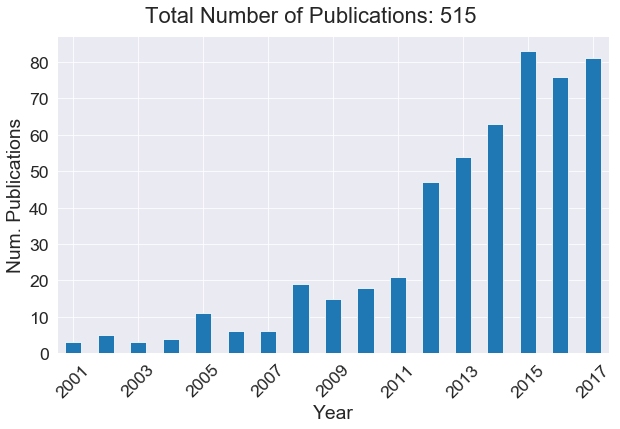

In [9]:
gsa_keywords = ['global sensitivity analysis', 'GSA', 'global sensitivity']
gsa_matches = wosis.keyword_matches(RC, gsa_keywords, threshold=95.0)
gsa_publications = gsa_matches.combine_recs()

wos_plot.plot_pub_trend(gsa_publications)

Papers with GSA related keywords occuring in the searched fields have been increasing, both in absolute and relative terms compared against the filtered corpora

In [13]:
gsa_publications.name = 'GSA'

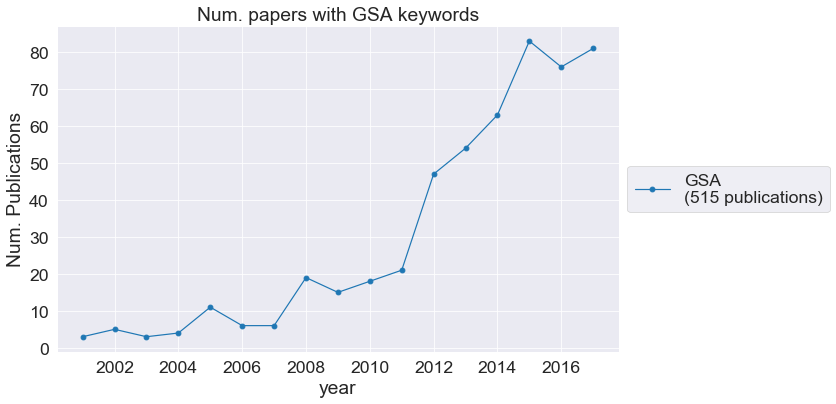

In [18]:
wos_plot.plot_topic_trend([gsa_publications], title='Num. papers with GSA keywords', save_plot_fn='figs/gsa_topic_trend_2000-2017.png')

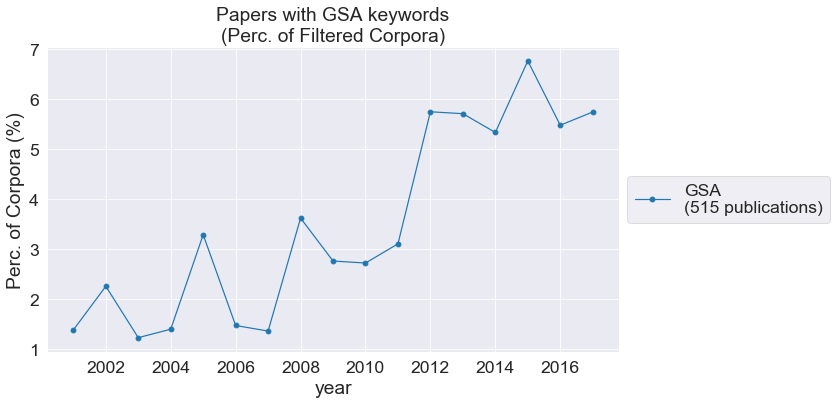

In [16]:
wos_plot.plot_topic_trend([gsa_publications], 
                          total_rc=RC, 
                          title='Papers with GSA keywords\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='figs/gsa_topic_trend_perc_2000-2017.png')

In [10]:
gsa_df = wosis.rc_to_df(gsa_publications)

In [11]:
gsa_df.to_csv('../data/gsa_matches_2000-2017.csv')